In [60]:
!pip install corpora

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for corpora: filename=Corpora-1.0-py3-none-any.whl size=5514 sha256=8b36eda50de18de41800eaae7125c91a86f6ef3d76f49d0a22e01de99ca55995
  Stored in directory: c:\users\jareen\appdata\local\pip\cache\wheels\9b\74\e3\2d190113243be68bcb25a48c1071e69badf939b0bc14521e08
Successfully built corpora


In [48]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 195.7 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/626.3 kB 272.3 kB/s eta 0:00:03
   ------ ------------------------------- 102.4/626.3 kB 368.6 kB/s eta 0:00:02
   ------------ ------------------------- 204.8/626.3 kB 655.1 kB/s eta 0:00:01
   ------------------------------ --------- 481.3/626.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.6 MB/s eta 0:00:00


In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from textblob import TextBlob


In [64]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JAREEN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [12]:
df = pd.read_csv('D:\\MSCDAD\\Data Mining & machine Learning\\Project\\AI vs human text data\\Training_Essay_Data.csv')

In [16]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       29145 non-null  object
 1   generated  29145 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 455.5+ KB


In [20]:
df.describe()

,generated
count,29145.000000
mean,0.399279
std,0.489759
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<Axes: xlabel='generated', ylabel='count'>

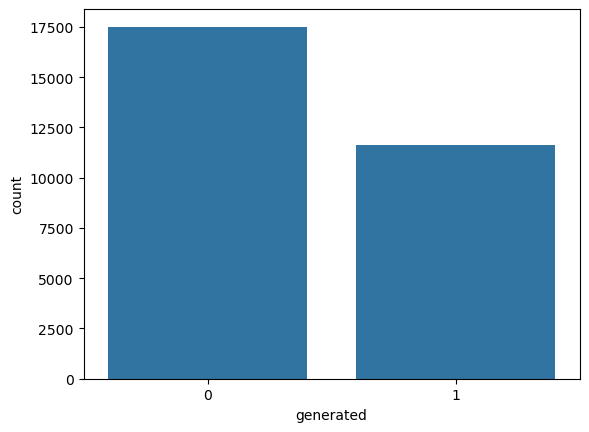

In [22]:
sns.countplot(data=df,x='generated')


In [24]:
print('Total Texts:', df['generated'].count())
print('Human Written Texts:', (df['generated'] == 0.0).sum())
print('AI Generated Texts:', (df['generated'] == 1.0).sum())


Total Texts: 29145
Human Written Texts: 17508
AI Generated Texts: 11637


In [26]:
df['text'][0]


"Car-free cities have become a subject of increasing interest and debate in recent years, as urban areas around the world grapple with the challenges of congestion, pollution, and limited resources. The concept of a car-free city involves creating urban environments where private automobiles are either significantly restricted or completely banned, with a focus on alternative transportation methods and sustainable urban planning. This essay explores the benefits, challenges, and potential solutions associated with the idea of car-free cities.  Benefits of Car-Free Cities  Environmental Sustainability: Car-free cities promote environmental sustainability by reducing air pollution and greenhouse gas emissions. Fewer cars on the road mean cleaner air and a significant decrease in the contribution to global warming.  Improved Public Health: A reduction in automobile usage can lead to better public health outcomes. Fewer cars on the road result in fewer accidents and a safer urban environme

In [28]:
# REMOVE PUNCTUATION
import string
def remove_punc(text):
    new_text = [x for x in text if x not in string.punctuation]
    new_text = ''.join(new_text)
    return new_text

df['text']=df['text'].apply(remove_punc)


In [68]:

stop_words = nltk.corpus.stopwords.words('english')

def normalize_text(text, stop_words):
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Tokenize and remove stopwords
    words = [word for word in blob.words if word.lower() not in stop_words]
    
    # Join the words back into a string
    return ' '.join(words)

# Apply the normalization to your DataFrame
df['text'] = df['text'].apply(lambda x: normalize_text(x, stop_words))


In [71]:
df['text'][0]


'Carfree cities become subject increasing interest debate recent years urban areas around world grapple challenges congestion pollution limited resources concept carfree city involves creating urban environments private automobiles either significantly restricted completely banned focus alternative transportation methods sustainable urban planning essay explores benefits challenges potential solutions associated idea carfree cities Benefits CarFree Cities Environmental Sustainability Carfree cities promote environmental sustainability reducing air pollution greenhouse gas emissions Fewer cars road mean cleaner air significant decrease contribution global warming Improved Public Health reduction automobile usage lead better public health outcomes Fewer cars road result fewer accidents safer urban environment pedestrians cyclists Moreover less air pollution lead reduced respiratory cardiovascular problems Efficient Use Space Carfree cities utilize urban space efficiently Parking lots wid

In [70]:
y=df['generated']
X=df['text']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(len(X_train))
print(len(y_train))


20401
20401


In [91]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [79]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])


In [81]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('naive_bayes', MultinomialNB())])

In [87]:
y_pred= pipeline.predict(X_test)


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5284
           1       0.99      0.94      0.97      3460

    accuracy                           0.97      8744
   macro avg       0.98      0.97      0.97      8744
weighted avg       0.98      0.97      0.97      8744



In [93]:
# Define models to compare
models = {
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier()
}
results = {}


In [99]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, mean_squared_error, confusion_matrix, f1_score


In [101]:
# Loop through each model, create a pipeline, and evaluate

def store_performance_metrics(y_test, y_pred, model_name):
    # Accuracy
    print(f"Performane for ${model_name}")
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    print("Cohen's Kappa:", kappa)
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)
    
    # RSS
    rss = np.sum((y_test - y_pred) ** 2)
    print("RSS:", rss)
    
    # Confusion Matrix for Sensitivity/Specificity
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]  # True positives
    TN = cm[0, 0]  # True negatives
    FP = cm[0, 1]  # False positives
    FN = cm[1, 0]  # False negatives
    
    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN)
    print("Sensitivity:", sensitivity)
    
    # Specificity
    specificity = TN / (TN + FP)
    print("Specificity:", specificity)
    
    # F1-Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1 Score:", f1)
    
    # MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print("MAPE:", mape)

for model_name, model in models.items():
    pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),  # Text preprocessing
        ('classifier', model)  # Model to be used
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = pipeline.predict(X_test)

    store_performance_metrics(y_test, y_pred, model_name)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = accuracy


Performane for $SVM
Accuracy: 0.9917657822506862
Cohen's Kappa: 0.9827892235380157
RMSE: 0.09074259060283553
RSS: 72
Sensitivity: 0.9907514450867052
Specificity: 0.9924299772899319
F1 Score: 0.9917674173961032
MAPE: inf
Performane for $Naive Bayes
Accuracy: 0.979871912168344
Cohen's Kappa: 0.9577564875659561
RMSE: 0.1418734923502484
RSS: 176
Sensitivity: 0.9638728323699421
Specificity: 0.9903482210446631
F1 Score: 0.9798331087221828
MAPE: inf
Performane for $Random Forest
Accuracy: 0.987419945105215
Cohen's Kappa: 0.9736110172192338
RMSE: 0.11216084385731499
RSS: 110
Sensitivity: 0.9748554913294798
Specificity: 0.9956472369417109
F1 Score: 0.9873990916164044
MAPE: inf
SVM: 99.18%
Naive Bayes: 97.99%
Random Forest: 98.74%


In [103]:

# Display the accuracy of each model
print("Accurracy of all models")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy * 100:.2f}%")

Accurracy of all models
SVM: 99.18%
Naive Bayes: 97.99%
Random Forest: 98.74%
